In [1]:
from boxoffice.db.frames import get_box_office_day_frame, get_movie_frame
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# the goal is to create a time series for Inside Out 2. This movie has id *5*

# get the box office day frame
bodf = get_box_office_day_frame()
mdf = get_movie_frame()

if bodf is None:
    print("No box office day frame")
    exit()

if mdf is None:
    print("No movie frame")
    exit()

# get the movie id for Inside Out 2
inside_out_days = bodf[bodf["movie"] == 5]

# sort the days by date
inside_out_days = inside_out_days.sort_values("date")

# reset the index
inside_out_days = inside_out_days.reset_index()


ADF Statistic: -4.772610327660775
p-value: 6.134148136049935e-05


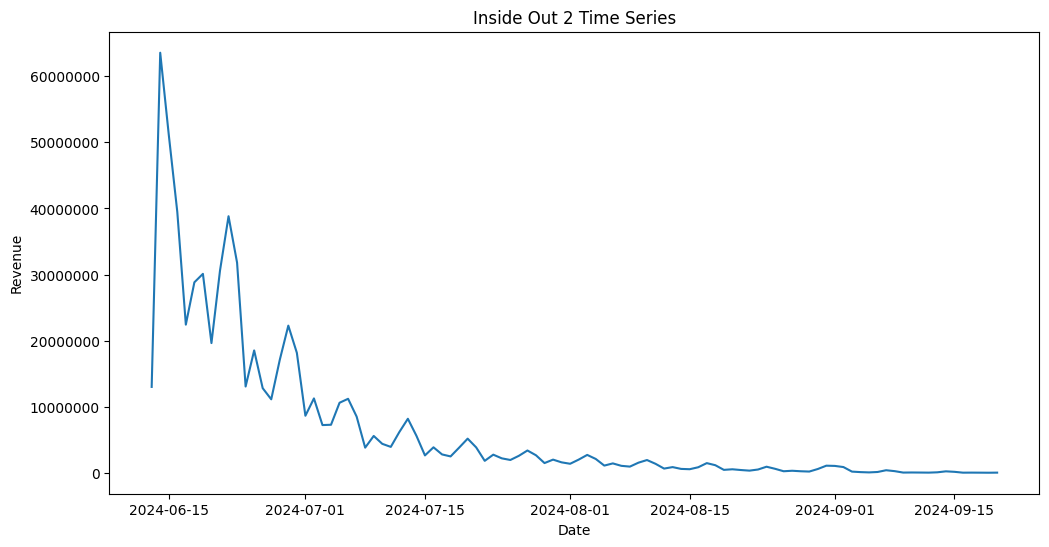

In [2]:

def plot_time_series(df, title: str):
    plt.figure(figsize=(12, 6))

    sns.lineplot(x="date", y="revenue", data=df)

    plt.title(title)

    plt.ylabel("Revenue")

    plt.xlabel("Date")

    # make y axis values correct
    plt.ticklabel_format(style="plain", axis="y")

    plt.show()


# check if the data is stationary
result = adfuller(inside_out_days["revenue"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

plot_time_series(inside_out_days, "Inside Out 2 Time Series")

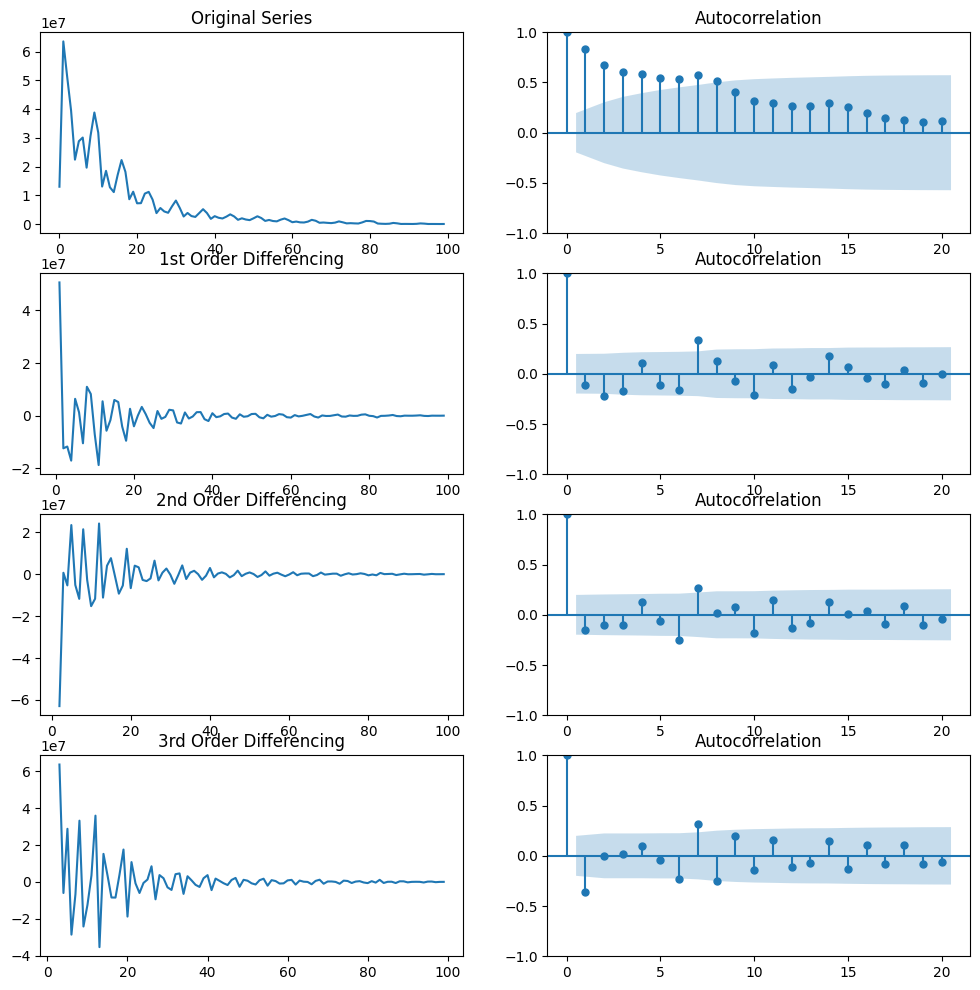

In [3]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

val = inside_out_days["revenue"]

# Original Series
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(val.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(val.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(val.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(val.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(val.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(val.diff().diff().diff().dropna(), ax=axes[3, 1])

# fix the axes
plt.ticklabel_format(style="plain", axis="y")


plt.show()

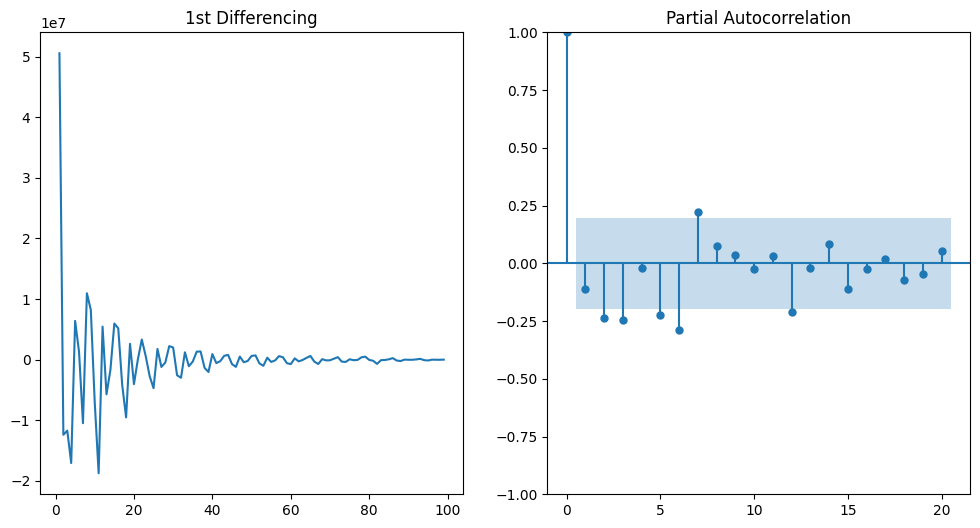

In [4]:
# now make a pacf plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(val.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(val.diff().dropna(), ax=axes[1])
plt.show()

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1736.879
Date:                Thu, 03 Oct 2024   AIC                           3479.757
Time:                        20:37:58   BIC                           3487.543
Sample:                             0   HQIC                          3482.907
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6024      0.067      8.943      0.000       0.470       0.734
ma.L1         -0.8879      0.022    -40.300      0.000      -0.931      -0.845
sigma2      1.249e+13   1.12e-14   1.12e+27      0.0

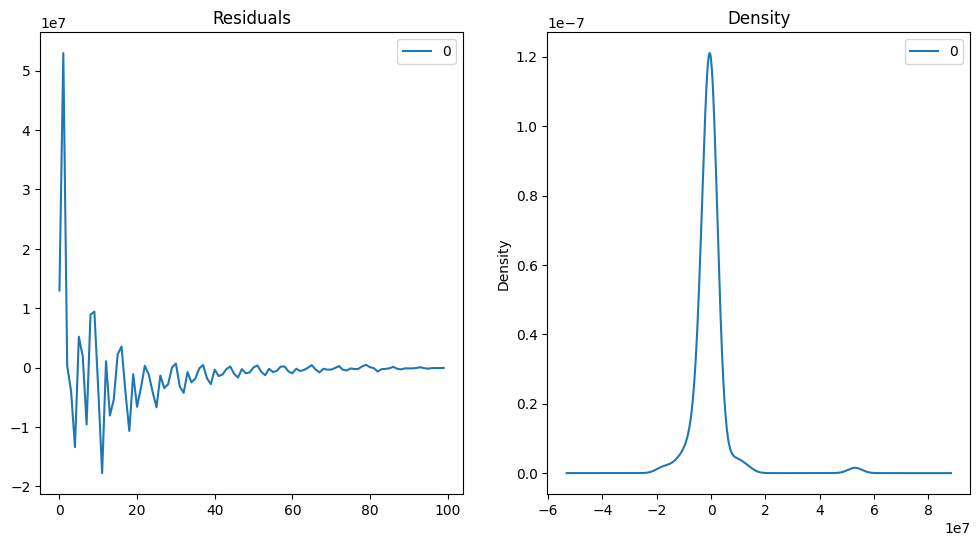

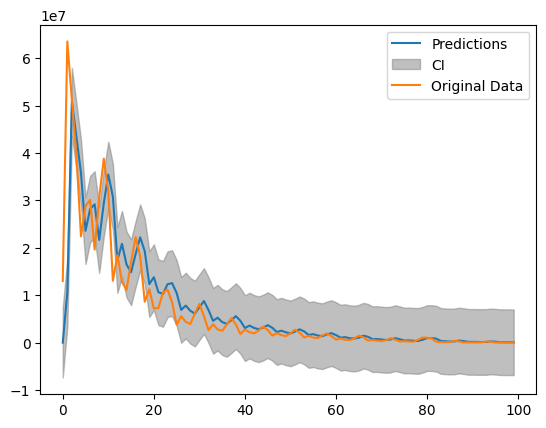

In [5]:
# build an arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(val, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

plot_predict(model_fit)
# also plot the original data
plt.plot(val)

plt.legend(["Predictions", "CI", "Original Data"])

plt.show()